## Author: Joshua Ewer {-}

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

### Load into pandas dataframe {-}

In [4]:
mpg_df = pd.read_csv('auto-mpg.csv')
print(mpg_df.info())
mpg_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Prep data {-}

In [6]:
# remove car column name
mpg_df = mpg_df.drop(columns=['car name'])

In [7]:
# find any non-numeric data in horsepower
def is_nan(value): 
    try: 
        pd.to_numeric(value) 
        return False 
    except ValueError: 
        return True

nan_horsepower = mpg_df['horsepower'].apply(lambda x: is_nan(x))
mpg_df[nan_horsepower]                  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [8]:
# replace nan values with column mean
mpg_df['horsepower'] = pd.to_numeric(mpg_df['horsepower'], errors='coerce')
mpg_df['horsepower'] = mpg_df['horsepower'].fillna(mpg_df['horsepower'].mean())   

mpg_df[nan_horsepower]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,104.469388,2046,19.0,71,1
126,21.0,6,200.0,104.469388,2875,17.0,74,1
330,40.9,4,85.0,104.469388,1835,17.3,80,2
336,23.6,4,140.0,104.469388,2905,14.3,80,1
354,34.5,4,100.0,104.469388,2320,15.8,81,2
374,23.0,4,151.0,104.469388,3035,20.5,82,1


In [9]:
## create dummy for the origin column
mpg_with_dummies = pd.get_dummies(mpg_df, columns=['origin'])
mpg_with_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,True,False,False


### Correlation Visualization {-}

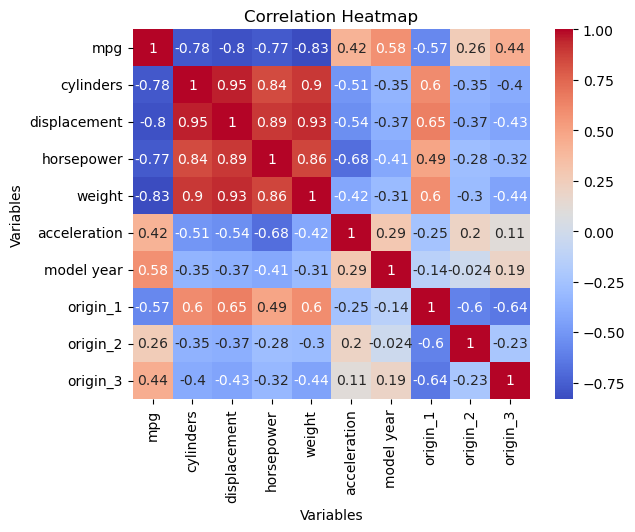

In [11]:
corr = mpg_with_dummies.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap') 
plt.xlabel('Variables') 
plt.ylabel('Variables')
plt.show()

Displacement, cylinders, horsepower, and weight are all highly correlated to mpg

### Plot mpg vs weight {-}


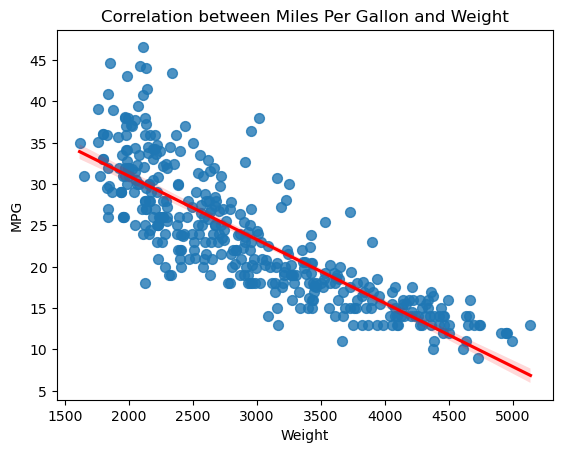

In [14]:
sns.regplot(x='weight', y='mpg', data=mpg_with_dummies, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Correlation between Miles Per Gallon and Weight') 
plt.xlabel('Weight') 
plt.ylabel('MPG') 
plt.show()

There is a linear negative correlation between miles per gallon and weight.  The steepness of the regression line shows the same high correlation as noted in the correlation heatmap.

### Test/train split {-}


In [17]:
from sklearn.model_selection import train_test_split

x = mpg_with_dummies[['weight']]
y = mpg_with_dummies['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
                                                    

### Linear Regression Model {-}

In [40]:
from sklearn.linear_model import LinearRegression
logit = LinearRegression()

logit.fit(x_train, y_train)

print("Coefficients:", logit.coef_) 
print("Intercept:",logit.intercept_)

Coefficients: [-0.0076827]
Intercept: 46.429533893620516


### Calculate R2, RMSE, MAE {-}

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

In [45]:
def compute_errors(y_train, y_train_pred, y_test, y_test_pred):
    
    # Calculate errors for the train set
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    
    # Calculate errors for the test set
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    print("Training R²:", r2_train)
    print("Training RMSE:", rmse_train)
    print("Training MAE:", mae_train)
    print("Testing R²:", r2_test)
    print("Testing RMSE:", rmse_test)
    print("Testing MAE:", mae_test)

compute_errors(y_train, y_train_pred, y_test, y_test_pred) 

Training R²: 0.6991221169672561
Training RMSE: 4.335318281861094
Training MAE: 3.2672928816673132
Testing R²: 0.6527591903820222
Testing RMSE: 4.332351830576905
Testing MAE: 3.4355841251930075


- R^2 helps describe how predictable the dependent variable is from the independent variable.  Since the R^2 score is closer to 1 than 0, it means a better fit for the model.  In this case, about 70%  of the variance is explained by the model.  The test R^2 is slightly less accurate, but very close.
- RMSE measures the magnitude of errors between predicted and actual values.  The lower the RMSE, the better the model will perform.  In this case, the difference is in single digits, which is not a large magnitude difference considering the possible range of MPG values. The test RMSE has a similar measurement.
- MAE describes a similar difference, but without regard to direction.  A lower value also describes a model that has good performance.  

### Another regression model {-}
I chose a decision tree regression because it has a really similar characteristics to the linear regression model, but uses a tree of decisions to make its predictions

In [47]:
from sklearn.tree import DecisionTreeRegressor
logit = DecisionTreeRegressor()

logit.fit(x_train, y_train)

y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

compute_errors(y_train, y_train_pred, y_test, y_test_pred) 

Training R²: 0.9650006833305326
Training RMSE: 1.4786168036349425
Training MAE: 0.5169811320754717
Testing R²: 0.3464041442725174
Testing RMSE: 5.943783517255654
Testing MAE: 4.25125


The results using the decision tree _seem_ significantly better, but there are signs of overfitting. The R^2 for the training set is very, very high, yet the same value for the test set is very low.  The same pattern exists with the RMSE and MAE being very low for the training set, but high for the test set.  After doing some research on alternative models, a Lasso or Ridge regression might be a good choice since it addresses overfitting with regularization. You could also use cross validation, which splits the data into multiple test/train splits.

For funsies, see what it looks like with a Ridge regression and cross validation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
logit = Ridge(alpha=1.0)

logit.fit(x_train, y_train)

y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

rmse_scorer = make_scorer(mean_squared_error, squared=False)
scores = cross_val_score(logit, x, y, cv=5, scoring=rmse_scorer) 
print("Cross-Validation RMSE Scores:", scores)
print("Mean RMSE Score:", scores.mean())

Cross-Validation RMSE Scores: [4.37683526 4.74082558 2.6837061  3.91519177 7.86893553]
Mean RMSE Score: 4.717098850272489


With cross validation and a ridge regression, we get a slightly better RMSE than without.